In [2]:
!jt -t monokai

In [63]:
#import required libraries
import numpy as np #for dealing high demensional data
import pandas as pd #to do statistical data analysis
import matplotlib.pyplot as plt #for 2D visualization
import seaborn as sns #High end data visualization

In [64]:
#read the dataset
dataset=pd.read_excel('flood dataset.xlsx')

In [65]:
#check the first 5 observations
dataset.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [66]:
print(dataset.shape)

(115, 11)


In [67]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB
None


In [68]:
dataset.columns

Index(['Temp', 'Humidity', 'Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'avgjune', 'sub', 'flood'],
      dtype='object')

In [69]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,115.0,29.600000,1.122341,28.0,29.000000,30.000000,31.000000,31.000000
Humidity,115.0,73.852174,2.947623,70.0,71.000000,74.000000,76.000000,79.000000
Cloud Cover,115.0,36.286957,4.330158,30.0,32.500000,36.000000,40.000000,44.000000
ANNUAL,115.0,2925.487826,422.112193,2068.8,2627.900000,2937.500000,3164.100000,4257.800000
Jan-Feb,115.0,27.739130,22.361032,0.3,10.250000,20.500000,41.600000,98.100000
Mar-May,115.0,377.253913,151.091850,89.9,276.750000,342.000000,442.300000,915.200000
Jun-Sep,115.0,2022.840870,386.254397,1104.3,1768.850000,1948.700000,2242.900000,3451.300000
Oct-Dec,115.0,497.636522,129.860643,166.6,407.450000,501.500000,584.550000,823.300000
avgjune,115.0,218.100870,62.547597,65.6,179.666667,211.033333,263.833333,366.066667
sub,115.0,439.801739,210.438813,34.2,295.000000,430.600000,577.650000,982.700000


In [70]:
#checking null values
dataset.isnull().any()

Temp           False
Humidity       False
Cloud Cover    False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
avgjune        False
sub            False
flood          False
dtype: bool

In [71]:
#Correlation
dataset.corr()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
Temp,1.000000,-0.012727,-0.046568,-0.063014,-0.080076,0.099519,-0.081965,-0.063034,-0.019751,-0.088331,-0.080946
Humidity,-0.012727,1.000000,0.085824,-0.054767,-0.185965,-0.101232,-0.029583,0.059739,0.017656,0.029981,0.020250
Cloud Cover,-0.046568,0.085824,1.000000,0.051166,0.004376,0.096645,0.010833,0.020966,-0.089843,-0.106455,0.089801
ANNUAL,-0.063014,-0.054767,0.051166,1.000000,0.033639,0.387790,0.861190,0.232069,0.474644,0.220009,0.626874
Jan-Feb,-0.080076,-0.185965,0.004376,0.033639,1.000000,0.066479,0.001178,-0.143670,0.164691,0.201266,-0.084446
Mar-May,0.099519,-0.101232,0.096645,0.387790,0.066479,1.000000,-0.029007,0.171805,0.019183,-0.475750,-0.017598
Jun-Sep,-0.081965,-0.029583,0.010833,0.861190,0.001178,-0.029007,1.000000,-0.141467,0.511113,0.431997,0.705202
Oct-Dec,-0.063034,0.059739,0.020966,0.232069,-0.143670,0.171805,-0.141467,1.000000,-0.028055,-0.050862,-0.024852
avgjune,-0.019751,0.017656,-0.089843,0.474644,0.164691,0.019183,0.511113,-0.028055,1.000000,0.780445,0.379778
sub,-0.088331,0.029981,-0.106455,0.220009,0.201266,-0.475750,0.431997,-0.050862,0.780445,1.000000,0.349828


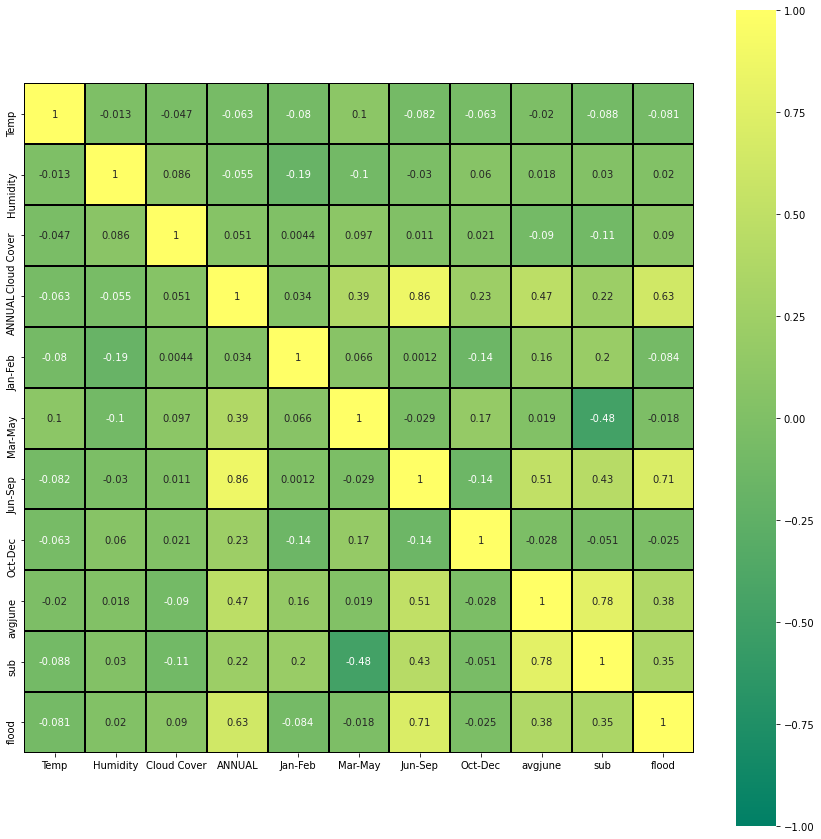

In [72]:
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(dataset.corr(),annot=True,cmap='summer',
                linewidths=1,linecolor='k',square=True,
                mask=False, vmin=-1, vmax=1,
                cbar_kws={"orientation": "vertical"},cbar=True)

In [73]:
dataset.drop(["Oct-Dec"],axis=1,inplace=True)

In [74]:
dataset.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,283.400000,586.9,0


In [75]:
dataset['flood'].value_counts()

0    99
1    16
Name: flood, dtype: int64

In [76]:
#independent features
x=dataset.iloc[:,2:7].values

In [77]:
#dependent feature
y=dataset.iloc[:,9:].values

In [78]:
x.shape

(115, 5)

In [79]:
y.shape

(115, 1)

In [80]:
#split the data into train and test set from our x and y
#import train_test_split fucntion
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [81]:
#checking the shape of our 4 variables
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(86, 5)
(29, 5)
(86, 1)
(29, 1)


In [82]:
#import Standardscaler
from sklearn.preprocessing import StandardScaler
#create object to Standardscaler class
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [83]:
#import dump class from joblib
from joblib import dump
dump(sc,"transform.save")

['transform.save']

In [84]:
#pip install xgboost

#import xgboost
import xgboost as xgb
#hyper parameter tuning to xgboost
xg_cla = xgb.XGBClassifier(objective ='reg:linear',learning_rate = 0.1,
                max_depth = 5, n_estimators = 10)

In [85]:
#fit the model
xg_cla.fit(x_train,y_train)

[17:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\smartbridge\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\smartbridge\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\smartbridge\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [86]:
#predictions with unseen data by model
y_pred_xgb = xg_cla.predict(x_test)
y_pred_xgb

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
#checking the accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_test,y_pred_xgb)
acc


0.9655172413793104

In [88]:
#summary of predictions
cm2=confusion_matrix(y_test,y_pred_xgb)
cm2

array([[25,  1],
       [ 0,  3]], dtype=int64)

In [89]:
y_pred_xgb.shape

(29,)

In [90]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("RMSE: %f" % (rmse))

RMSE: 0.185695


In [91]:
dataset.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,283.400000,586.9,0


In [92]:
rand_pred = xg_cla.predict(sc.transform([[30,3248.6,73.4,386.2,2122.8]]))
rand_pred

array([0], dtype=int64)

In [93]:
rand_pred1 = xg_cla.predict(sc.transform([[40,3326.6,9.3,275.7,2403.4]]))
rand_pred1

array([1], dtype=int64)

In [94]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [95]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[17:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:12:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [96]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.483268,0.006576,0.485071,0.002133
1,0.463432,0.011184,0.467149,0.010004
2,0.450748,0.015905,0.456278,0.012084
3,0.434753,0.015569,0.441904,0.016987
4,0.420652,0.017029,0.429317,0.023831


In [97]:
xg_cla_model = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[17:12:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


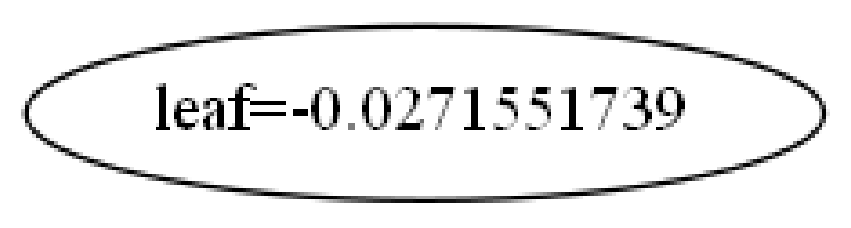

In [98]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_cla_model,num_trees=0)
plt.rcParams['figure.figsize'] = [15,15]
plt.show()

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
y_predict = dtc.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [102]:
acc=accuracy_score(y_test,y_predict)
acc

0.9655172413793104

In [103]:
acc=accuracy_score(y_test,y_pred_xgb)
acc

0.9655172413793104

In [104]:
cm1=confusion_matrix(y_test,y_predict)
cm1

array([[25,  1],
       [ 0,  3]], dtype=int64)

In [105]:
cm2=confusion_matrix(y_test,y_pred_xgb)
cm2

array([[25,  1],
       [ 0,  3]], dtype=int64)

In [106]:
#saving the file
from joblib import dump
dump(xg_cla,'floods.save')

['floods.save']